In [20]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# Classification

In [5]:
digits = datasets.load_digits()

In [6]:
digits.keys()

dict_keys(['DESCR', 'target', 'target_names', 'images', 'data'])

In [12]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


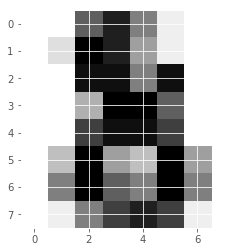

In [15]:
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [19]:
print(digits.target[1796]) # Above image is an 8

8


In [22]:
X = digits.data
y = digits.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
#  Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [25]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### Finding the best value of n_neighbors

In [26]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [27]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

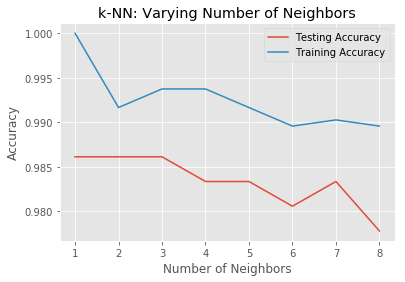

In [28]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


#### From the above graph, it's obvious that when n=3, the accuracy is the highest on test set. Above n=7, it tends to underfit

# Regression